## Logistic Regression

Logistic Regression is usually used when data are categorical.

In [1]:
# import everything we need first
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

We are going to import some dummy value from a sample csv `LogReg-dummy.csv`
For better understanding, we can see the independent variable (x) as the age of children, and the dependent variable (y) as whether the child is infected by some disease.

0 means not infected
1 means infected
As the dependent variable only has two possible values, 0 or 1, we can use a binary logistic model to predict.

In [2]:
# read in data from the file
df = pd.read_csv('Logistic_Reg_Infected.csv').dropna()
df.head() # show the first five values

,age,sleep,infected
0,1.2,5.0,0
1,2.0,5.6,0
2,2.2,6.5,0
3,12.1,10.3,1
4,6.3,5.3,0


In [3]:
df.tail() # show the last five values

,age,sleep,infected
14,4.0,9.0,0
15,12.3,8.0,1
16,13.0,11.0,0
17,14.0,9.7,1
18,18.5,8.5,1


In [4]:
df.describe()

,age,sleep,infected
count,19.000000,19.000000,19.000000
mean,8.803158,8.326316,0.421053
std,4.474119,1.830253,0.507257
min,1.200000,5.000000,0.000000
25%,6.480000,7.000000,0.000000
50%,9.000000,8.800000,0.000000
75%,12.050000,9.750000,1.000000
max,18.500000,11.000000,1.000000


# Visualize the data

In [5]:
df_0 = df[df['infected'] == 0]
df_1 = df[df['infected'] == 1]

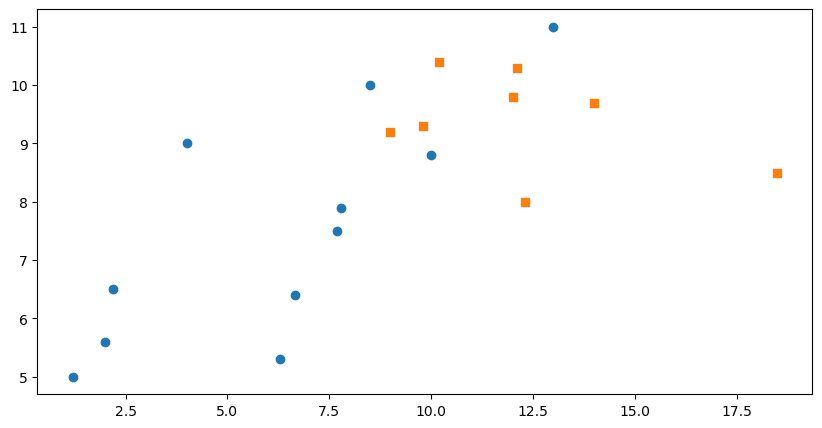

In [6]:
# in this plot, data points above the line are categorized as 1, those below the line are categorized as 0
# this line is our regression model's decision boundary
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(df_0['age'], df_0['sleep']) # class = 0 circle points 
ax.scatter(df_1['age'], df_1['sleep'], marker = 's') # class = 1 square points
x_min, x_max = ax.get_xlim()

## Model training

We are going to use the same technic to build a Logistic Regression model.


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg = LogisticRegression(solver = 'lbfgs')

x = df[['age', 'sleep']]
y = df['infected']    # Classification : infected = 0 or 1



In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)
x_train.head()

,age,sleep
16,13.00,11.0
6,7.70,7.5
4,6.30,5.3
2,2.20,6.5
5,6.66,6.4


In [9]:
logReg.fit(x_train, y_train)

LogisticRegression()

# Evaluate Model with Accuracy Score

We can use our model to predict values.

In [10]:
from sklearn.metrics import accuracy_score

y_pred = logReg.predict(x_test)
print(y_test)
print(y_pred)

10    1
1     0
8     0
18    1
14    0
Name: infected, dtype: int64
[0 0 0 1 0]


In [11]:
accuracy_score(y_test, y_pred)

0.8

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix (y_test, y_pred, labels = [1,0])

array([[1, 1],
       [0, 3]], dtype=int64)

In [13]:
logReg.predict(x_test)  # prediction value of x_test

array([0, 0, 0, 1, 0], dtype=int64)

# Predict 
Predict with some values

In [14]:
# predict y when x1 = 7.5 and x2 = 0.65
logReg.predict([[7.5,0.65]])  

C:\Users\Cyrus\miniforge3\envs\sa55\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [15]:
# predict y when x1 = 10 and x2 = 0.74
print(logReg.predict([[10, 0.74]]))

[0]


C:\Users\Cyrus\miniforge3\envs\sa55\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Probability

In logistic regression, we could retrieve the probability of the classification outcome.

In [16]:
# probability of getting 0 versus 1
logReg.predict_proba(x_test)

array([[0.51389417, 0.48610583],
       [0.99133891, 0.00866109],
       [0.62011799, 0.37988201],
       [0.02035873, 0.97964127],
       [0.94756335, 0.05243665]])

In [17]:
# probability of getting 0 versus 1
logReg.predict_proba([[10, 0.74]])

C:\Users\Cyrus\miniforge3\envs\sa55\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.90131279, 0.09868721]])